In [1]:
import pandas  as pd
import numpy as np
import matplotlib as plt
import datetime as dt
import seaborn as sns

In [2]:
dfcab=pd.read_csv('Cab_Data - Copy.csv')

In [3]:
dfcity=pd.read_csv('City.csv')

In [4]:
dftr=pd.read_csv('Transaction_ID.csv')

In [5]:
dfcus=pd.read_csv('Customer_ID.csv')

In [6]:
dfcab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011.0,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012.0,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013.0,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014.0,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015.0,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:


dfcus.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
dfcity.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
dftr.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
dfcab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359393 entries, 0 to 359392
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359391 non-null  float64
 1   Date of Travel  359393 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(4), object(3)
memory usage: 19.2+ MB


### Changing the date to datetime

#### dropping the row with bad data

In [11]:
indexNames = dfcab[dfcab['Date of Travel'] == '10000026'].index
 
# Delete these row indexes from dataFrame
dfcab.drop(indexNames , inplace=True)

In [12]:
dfcab['Date of Travel'] = pd.to_datetime(dfcab['Date of Travel'], format='%d/%m/%Y')


#### Dropping the row with missing values

In [13]:
dfcab.shape

(359392, 7)

In [14]:
dfcity.shape


(20, 3)

In [15]:
dfcus.shape


(49171, 4)

In [16]:
dftr.shape

(440098, 3)

In [17]:
dfcab.dropna()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012.0,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013.0,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014.0,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015.0,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359388,10440101.0,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359389,10440104.0,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359390,10440105.0,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359391,10440106.0,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


1 row deleted


In [18]:
dfcab['Date of Travel'] = pd.to_datetime(dfcab['Date of Travel'], format='%d-%m-%Y')

In [19]:
dfcab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359392
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359391 non-null  float64       
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 21.9+ MB


#### Splitting dates into days, months and year

In [20]:
dfcab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012.0,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013.0,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014.0,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015.0,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [21]:
dfcab['year']= dfcab['Date of Travel'].dt.year
dfcab['month']= dfcab['Date of Travel'].dt.month
dfcab['day']= dfcab['Date of Travel'].dt.day

In [22]:
dfcab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,year,month,day
0,10000011.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,8
1,10000012.0,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,6
2,10000013.0,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,2
3,10000014.0,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,7
4,10000015.0,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1,3


In [23]:
dfcab['Profit']=dfcab['Price Charged']-dfcab['Cost of Trip']

In [24]:
dfcab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,year,month,day,Profit
0,10000011.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,8,57.315
1,10000012.0,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,6,23.666
2,10000013.0,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,2,27.568
3,10000014.0,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,7,25.798
4,10000015.0,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1,3,16.844


##### Joining cab and transcation dataframe

In [25]:
left = dfcab.set_index(['Transaction ID'])
right = dftr.set_index(['Transaction ID'])

data = left.join(right)

In [26]:
data.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,year,month,day,Profit,Customer ID,Payment_Mode
Transaction ID,,,,,,,,,,,,
10000011.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,8,57.315,29290.0,Card
10000012.0,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,6,23.666,27703.0,Card
10000013.0,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,2,27.568,28712.0,Cash
10000014.0,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,7,25.798,28020.0,Cash
10000015.0,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1,3,16.844,27182.0,Card


In [27]:
data.shape

(359392, 12)

In [28]:
# Join with customer ID

left = data.set_index([data.index,'Customer ID'])
right = dfcus.set_index(['Customer ID'])
data = left.join(right)

In [29]:
data.head()

,,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,year,month,day,Profit,Payment_Mode,Gender,Age,Income (USD/Month)
Transaction ID,Customer ID,,,,,,,,,,,,,,
10000011.0,29290.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,8,57.315,Card,Male,28,10813
10000012.0,27703.0,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,6,23.666,Card,Male,27,9237
10000013.0,28712.0,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,2,27.568,Cash,Male,53,11242
10000014.0,28020.0,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,7,25.798,Cash,Male,23,23327
10000015.0,27182.0,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1,3,16.844,Card,Male,33,8536


In [30]:
data.shape

(359392, 14)

In [31]:
# joining with city

left = data.set_index([data.index,'City'])
right = dfcity.set_index(['City'])
data = left.join(right)

In [32]:
data.head()

,,,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,year,month,day,Profit,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
Transaction ID,Customer ID,City,,,,,,,,,,,,,,,
10000011.0,29290.0,ATLANTA GA,2016-01-08,Pink Cab,30.45,370.95,313.635,2016,1,8,57.315,Card,Male,28,10813,"814,885","24,701"
10000012.0,27703.0,ATLANTA GA,2016-01-06,Pink Cab,28.62,358.52,334.854,2016,1,6,23.666,Card,Male,27,9237,"814,885","24,701"
10000013.0,28712.0,ATLANTA GA,2016-01-02,Pink Cab,9.04,125.20,97.632,2016,1,2,27.568,Cash,Male,53,11242,"814,885","24,701"
10000014.0,28020.0,ATLANTA GA,2016-01-07,Pink Cab,33.17,377.40,351.602,2016,1,7,25.798,Cash,Male,23,23327,"814,885","24,701"
10000015.0,27182.0,ATLANTA GA,2016-01-03,Pink Cab,8.73,114.62,97.776,2016,1,3,16.844,Card,Male,33,8536,"814,885","24,701"


In [33]:
data = data.reset_index()

In [34]:
data.head(20)

,Transaction ID,Customer ID,City,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,year,month,day,Profit,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011.0,29290.0,ATLANTA GA,2016-01-08,Pink Cab,30.45,370.95,313.635,2016,1,8,57.315,Card,Male,28,10813,"814,885","24,701"
1,10000012.0,27703.0,ATLANTA GA,2016-01-06,Pink Cab,28.62,358.52,334.854,2016,1,6,23.666,Card,Male,27,9237,"814,885","24,701"
2,10000013.0,28712.0,ATLANTA GA,2016-01-02,Pink Cab,9.04,125.20,97.632,2016,1,2,27.568,Cash,Male,53,11242,"814,885","24,701"
3,10000014.0,28020.0,ATLANTA GA,2016-01-07,Pink Cab,33.17,377.40,351.602,2016,1,7,25.798,Cash,Male,23,23327,"814,885","24,701"
4,10000015.0,27182.0,ATLANTA GA,2016-01-03,Pink Cab,8.73,114.62,97.776,2016,1,3,16.844,Card,Male,33,8536,"814,885","24,701"
5,10000016.0,27318.0,ATLANTA GA,2016-01-07,Pink Cab,6.06,72.43,63.024,2016,1,7,9.406,Cash,Male,25,13984,"814,885","24,701"
6,10000017.0,33788.0,AUSTIN TX,2016-01-03,Pink Cab,44.00,576.15,475.200,2016,1,3,100.950,Card,Male,23,23788,"698,371","14,978"
7,10000018.0,34106.0,AUSTIN TX,2016-01-07,Pink Cab,35.65,466.10,377.890,2016,1,7,88.210,Card,Male,19,19980,"698,371","14,978"
8,10000019.0,59799.0,BOSTON MA,2016-01-12,Pink Cab,14.40,191.61,146.880,2016,1,12,44.730,Cash,Male,33,19271,"248,968","80,021"
9,10000020.0,57982.0,BOSTON MA,2016-01-06,Pink Cab,10.89,156.98,113.256,2016,1,6,43.724,Cash,Male,57,5068,"248,968","80,021"


In [35]:
data.shape

(359392, 18)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359391 non-null  float64       
 1   Customer ID         359391 non-null  float64       
 2   City                359392 non-null  object        
 3   Date of Travel      359392 non-null  datetime64[ns]
 4   Company             359392 non-null  object        
 5   KM Travelled        359392 non-null  float64       
 6   Price Charged       359392 non-null  float64       
 7   Cost of Trip        359392 non-null  float64       
 8   year                359392 non-null  int64         
 9   month               359392 non-null  int64         
 10  day                 359392 non-null  int64         
 11  Profit              359392 non-null  float64       
 12  Payment_Mode        359391 non-null  object        
 13  Gender              359392 no

#### Detecting outliers

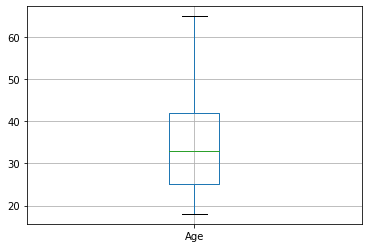

In [37]:
boxplot = data.boxplot(column=[ 'Age'])

There is no outliers and most of the users are between 25 to 42 years of age  with an average of 32 years

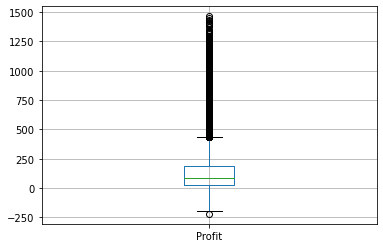

In [38]:
boxplot = data.boxplot(column=[ 'Profit'])

Renaming the column

In [39]:
for col in data.columns:
    if ' ' in col:
        data = data.rename(columns={col:col.replace(' ','_')})

#### Changing the data types of some column from float to int

In [40]:
data.Profit = data.Profit.astype(int)

In [41]:
data.KM_Travelled  = data.KM_Travelled .astype(int)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359391 non-null  float64       
 1   Customer_ID         359391 non-null  float64       
 2   City                359392 non-null  object        
 3   Date_of_Travel      359392 non-null  datetime64[ns]
 4   Company             359392 non-null  object        
 5   KM_Travelled        359392 non-null  int32         
 6   Price_Charged       359392 non-null  float64       
 7   Cost_of_Trip        359392 non-null  float64       
 8   year                359392 non-null  int64         
 9   month               359392 non-null  int64         
 10  day                 359392 non-null  int64         
 11  Profit              359392 non-null  int32         
 12  Payment_Mode        359391 non-null  object        
 13  Gender              359392 no

#### Find out the No. of unique value for each column

In [43]:
data.nunique()

Transaction_ID        359391
Customer_ID            46148
City                      19
Date_of_Travel          1095
Company                    2
KM_Travelled              48
Price_Charged          99176
Cost_of_Trip           16291
year                       3
month                     12
day                       31
Profit                  1319
Payment_Mode               2
Gender                     2
Age                       48
Income_(USD/Month)     22725
Population                19
Users                     19
dtype: int64

#### Statistical summary of our dataset

In [44]:
data.describe()

,Transaction_ID,Customer_ID,KM_Travelled,Price_Charged,Cost_of_Trip,year,month,day,Profit,Age,Income_(USD/Month)
count,3.593910e+05,359391.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.544271,22.097746,423.443311,286.190113,2017.045199,7.500434,15.628447,136.822495,35.336621,15048.805730
std,1.268054e+05,21012.342233,12.237099,274.378911,157.993661,0.800239,3.445095,8.827151,160.243897,12.594184,7969.411952
min,1.000001e+07,1.000000,1.000000,15.600000,19.000000,2016.000000,1.000000,1.000000,-220.000000,18.000000,2000.000000
25%,1.011081e+07,2705.000000,12.000000,206.437500,151.200000,2016.000000,5.000000,8.000000,28.000000,25.000000,8424.000000
50%,1.022104e+07,7459.000000,22.000000,386.360000,282.480000,2017.000000,8.000000,16.000000,81.000000,33.000000,14685.000000
75%,1.033094e+07,36077.500000,32.000000,583.660000,413.683200,2018.000000,10.000000,23.000000,190.000000,42.000000,21035.000000
max,1.044011e+07,60000.000000,48.000000,2048.030000,691.200000,2018.000000,12.000000,31.000000,1463.000000,65.000000,35000.000000


#### Yearly profit of both the company

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
pinkprofit=data[data.Company=='Pink Cab'].groupby('year').Profit.mean()
yellowprofit=data[data.Company=='Yellow Cab'].groupby('year').Profit.mean()

In [47]:
pinkprofit



year
2016    67.949761
2017    66.715939
2018    52.851450
Name: Profit, dtype: float64

In [48]:
yellowprofit

year
2016    168.895184
2017    168.369797
2018    142.965497
Name: Profit, dtype: float64

#### Average yearly profit of pink cab

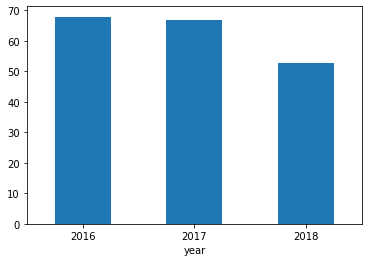

In [49]:
ax = pinkprofit.plot.bar(rot=0)

#### Average yearly profit of yellow cab

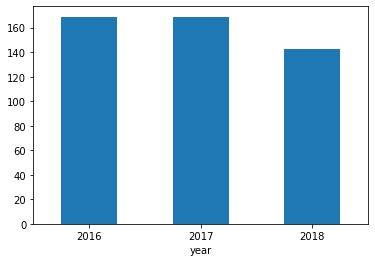

In [50]:
ax = yellowprofit.plot.bar(rot=0)

#### find out the date having maximum no. of travels 

In [51]:
datetr=data.groupby('Date_of_Travel').Transaction_ID.count().sort_values(ascending=False)

In [52]:
datetr.head(10)

Date_of_Travel
2018-01-05    2022
2017-12-15    1123
2017-12-08    1100
2018-12-15    1086
2017-11-24    1085
2018-12-22    1084
2018-12-14    1076
2017-12-22    1042
2018-11-24    1037
2018-01-06    1032
Name: Transaction_ID, dtype: int64

In [53]:
datetr.tail(10)

Date_of_Travel
2016-01-26    94
2018-01-22    93
2016-01-28    93
2018-01-28    92
2017-01-25    91
2016-01-19    88
2016-01-12    86
2016-01-11    85
2016-01-05    47
2016-01-04    25
Name: Transaction_ID, dtype: int64

### Above data clearly indicates that 
* Most of the travelling are done in the months of december (christmas might be the reason)
* year 2016 has less no. of travel as compared to 2017 and 2018

In [54]:
mtr=data.groupby(['month']).Transaction_ID.count()
mtr

month
1     23173
2     18307
3     21646
4     21434
5     23701
6     24713
7     27676
8     31323
9     36859
10    40852
11    42700
12    47007
Name: Transaction_ID, dtype: int64

In [55]:
ytr=data.groupby(['year']).Transaction_ID.count()
ytr

year
2016    107318
2017    128510
2018    123563
Name: Transaction_ID, dtype: int64

#### Monthwise Analysis

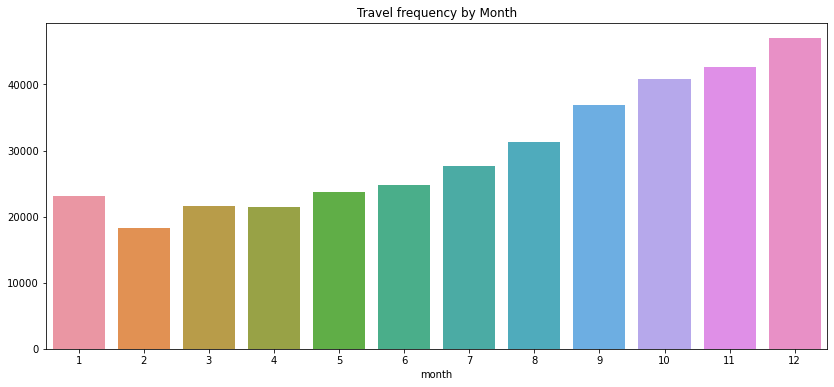

In [122]:
plt.figure(figsize=(14,6))
sns.barplot(x=mtr.index,y=mtr.values)
plt.title('Travel frequency by Month')
plt.show()

It Clearly depicts that there are more travelling in the months of July to December 

#### yearly Transaction Analysis

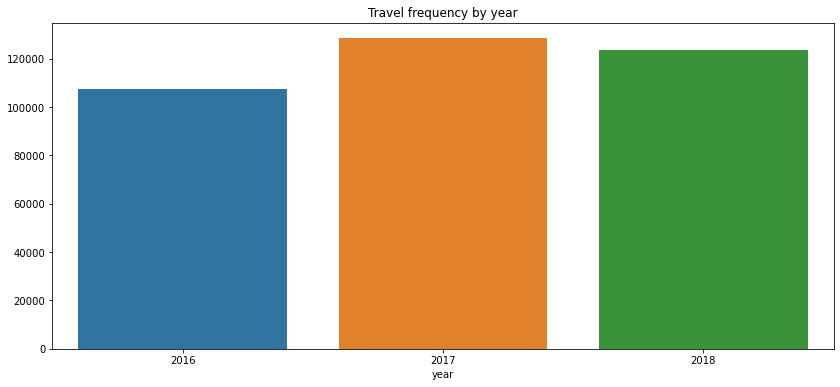

In [57]:
plt.figure(figsize=(14,6))
sns.barplot(x=ytr.index,y=ytr.values)
plt.title('Travel frequency by year')
plt.show()

2017 has the highest no. of travels

In [58]:
data.head()

,Transaction_ID,Customer_ID,City,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,year,month,day,Profit,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011.0,29290.0,ATLANTA GA,2016-01-08,Pink Cab,30,370.95,313.635,2016,1,8,57,Card,Male,28,10813,"814,885","24,701"
1,10000012.0,27703.0,ATLANTA GA,2016-01-06,Pink Cab,28,358.52,334.854,2016,1,6,23,Card,Male,27,9237,"814,885","24,701"
2,10000013.0,28712.0,ATLANTA GA,2016-01-02,Pink Cab,9,125.20,97.632,2016,1,2,27,Cash,Male,53,11242,"814,885","24,701"
3,10000014.0,28020.0,ATLANTA GA,2016-01-07,Pink Cab,33,377.40,351.602,2016,1,7,25,Cash,Male,23,23327,"814,885","24,701"
4,10000015.0,27182.0,ATLANTA GA,2016-01-03,Pink Cab,8,114.62,97.776,2016,1,3,16,Card,Male,33,8536,"814,885","24,701"


In [65]:
cytr = data.groupby(['year','Company']).Transaction_ID.count().to_frame().reset_index()
cytr

,year,Company,Transaction_ID
0,2016,Pink Cab,25079
1,2016,Yellow Cab,82239
2,2017,Pink Cab,30321
3,2017,Yellow Cab,98189
4,2018,Pink Cab,29310
5,2018,Yellow Cab,94253


#### Analysing distance travelled and Price Charged by the Companies

<AxesSubplot:xlabel='KM_Travelled', ylabel='Price_Charged'>

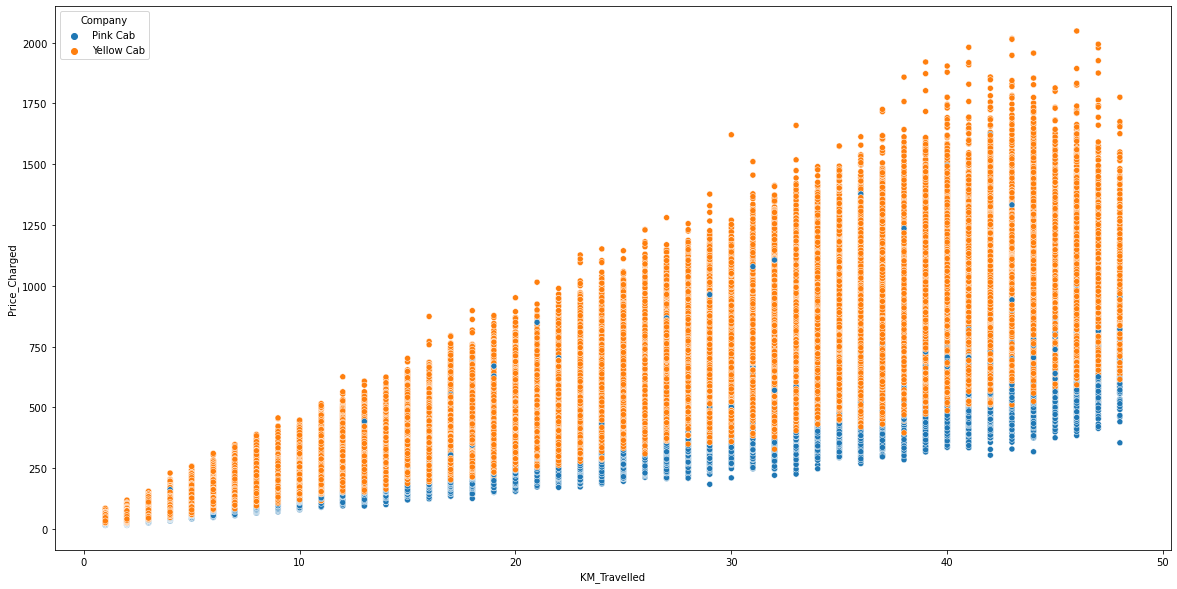

In [66]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x="KM_Travelled", y="Price_Charged", hue="Company")

#### It clearly shows that for the same distance travelled yellow cab is charging more amount

#### Analyzing distance travelled and profit made by the company

<AxesSubplot:xlabel='KM_Travelled', ylabel='Profit'>

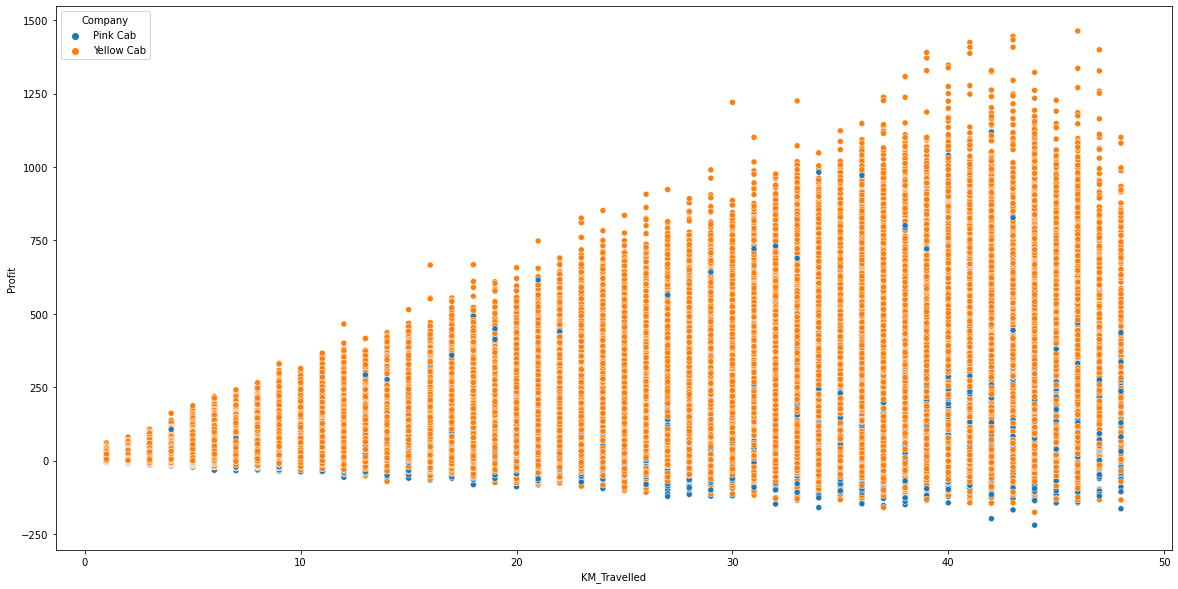

In [67]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x="KM_Travelled", y="Profit", hue="Company")

#### Age Analysis

In [76]:
plot_age = data.groupby('Age').Customer_ID.nunique()
plot_age.head()

Age
18    1450
19    1475
20    1535
21    1476
22    1499
Name: Customer_ID, dtype: int64

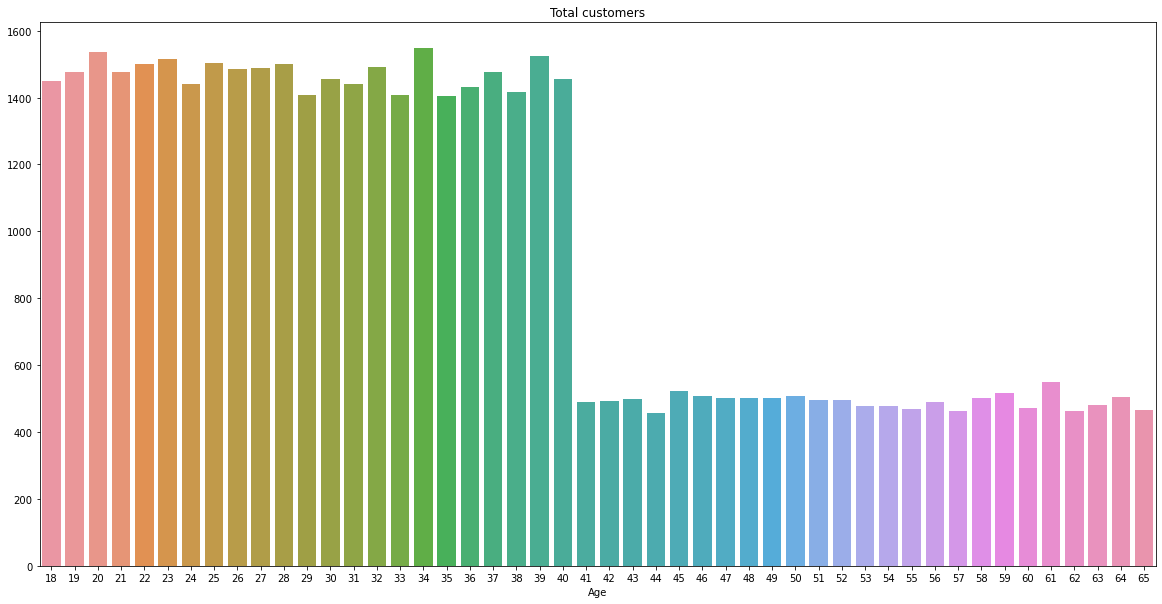

In [75]:
plt.figure(figsize=(20,10))
sns.barplot(x=plot_age.index,y=plot_age.values)
plt.title('Total customers')
plt.show()

##### It shows that Most of the customers are of the age of 18-40

In [77]:
data.groupby('Company').Age.mean()

Company
Pink Cab      35.322060
Yellow Cab    35.341112
Name: Age, dtype: float64

#### it shows that both the company have similar age group of customer in abundance

# return here

In [80]:
#renaming the column for operating on it
data = data.rename(columns={'Income_(USD/Month)':'Income'})

In [81]:
data.groupby('Company').Income.mean()

Company
Pink Cab      15058.974136
Yellow Cab    15045.669817
Name: Income, dtype: float64

<AxesSubplot:xlabel='Income', ylabel='Profit'>

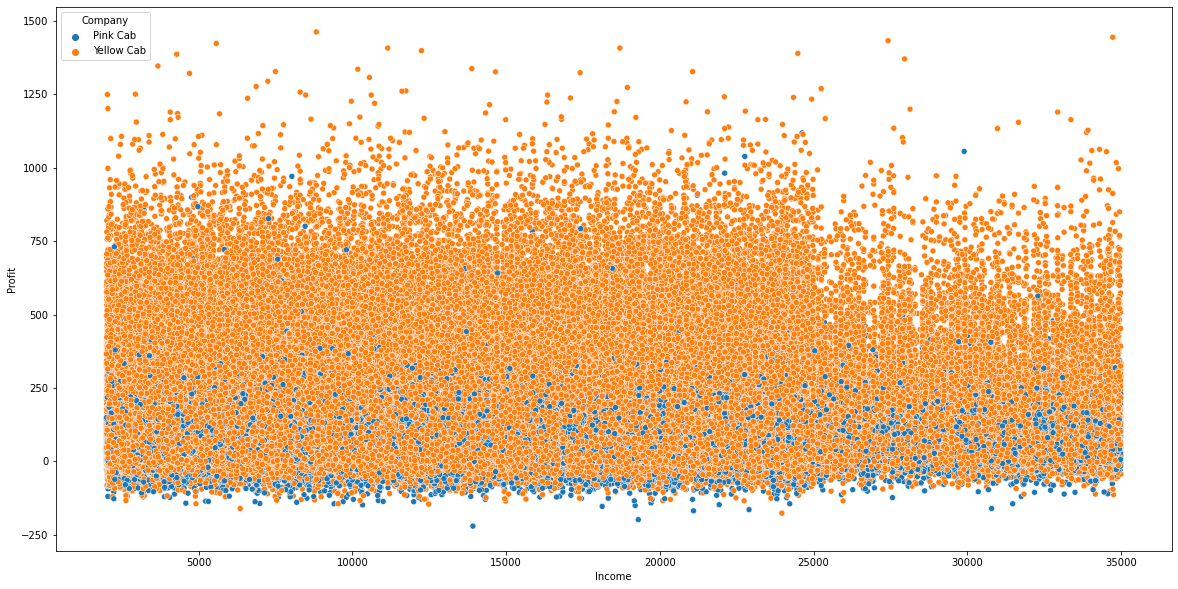

In [83]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, y="Profit", x="Income", hue="Company")

In [ ]:
Both the company don't have any biased towards any particular group

#### City wise Analysis

In [85]:
city = data.groupby('City').Transaction_ID.count()
city

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29691
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction_ID, dtype: int64

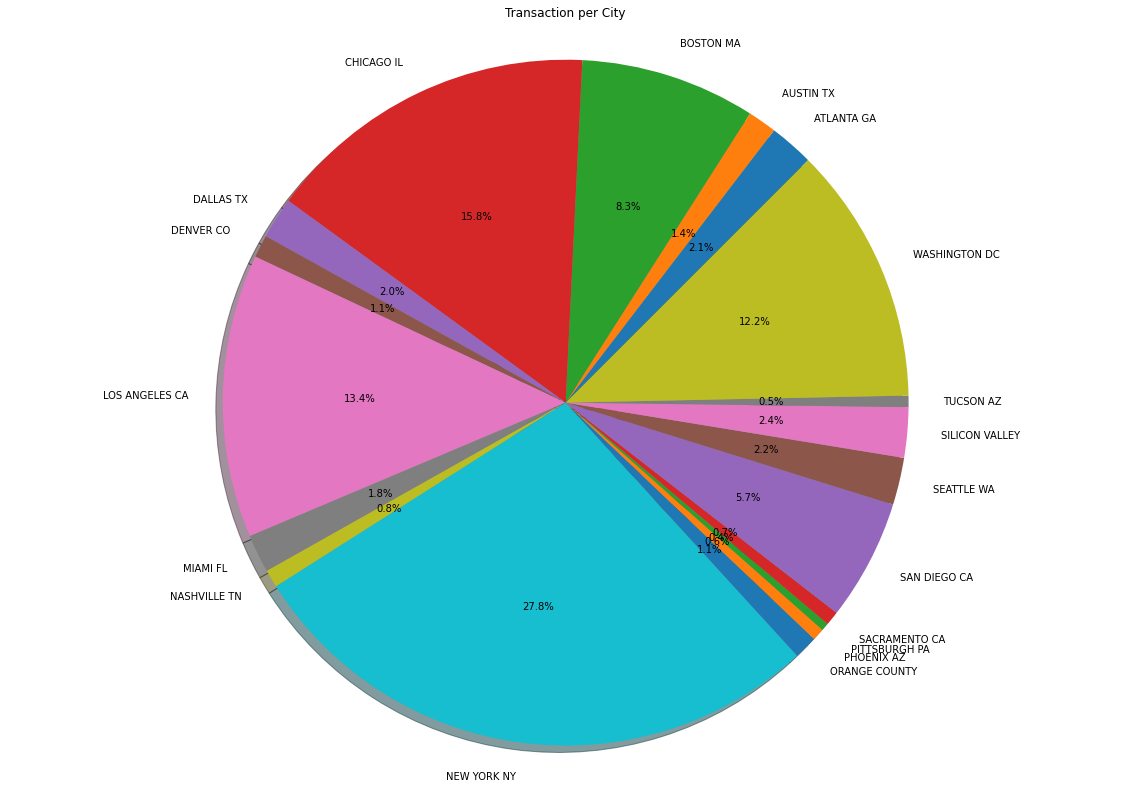

In [87]:
labs = city.index
vals = city.values
figp, axp = plt.subplots(figsize=(20,14))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=45,)
axp.axis('equal')

plt.title('Transaction per City')
plt.show()

### City wise Profit Analysis

In [88]:
cityp = data.groupby('City').Profit.mean()
cityp

City
ATLANTA GA        111.028583
AUSTIN TX         107.128268
BOSTON MA          59.195911
CHICAGO IL         59.459320
DALLAS TX         160.429101
DENVER CO         103.583529
LOS ANGELES CA     91.409781
MIAMI FL          117.044623
NASHVILLE TN       49.409635
NEW YORK NY       279.451379
ORANGE COUNTY     114.320944
PHOENIX AZ         93.098353
PITTSBURGH PA      64.617669
SACRAMENTO CA      49.288551
SAN DIEGO CA       77.030262
SEATTLE WA         75.218582
SILICON VALLEY    154.078061
TUCSON AZ          72.284309
WASHINGTON DC      79.436244
Name: Profit, dtype: float64

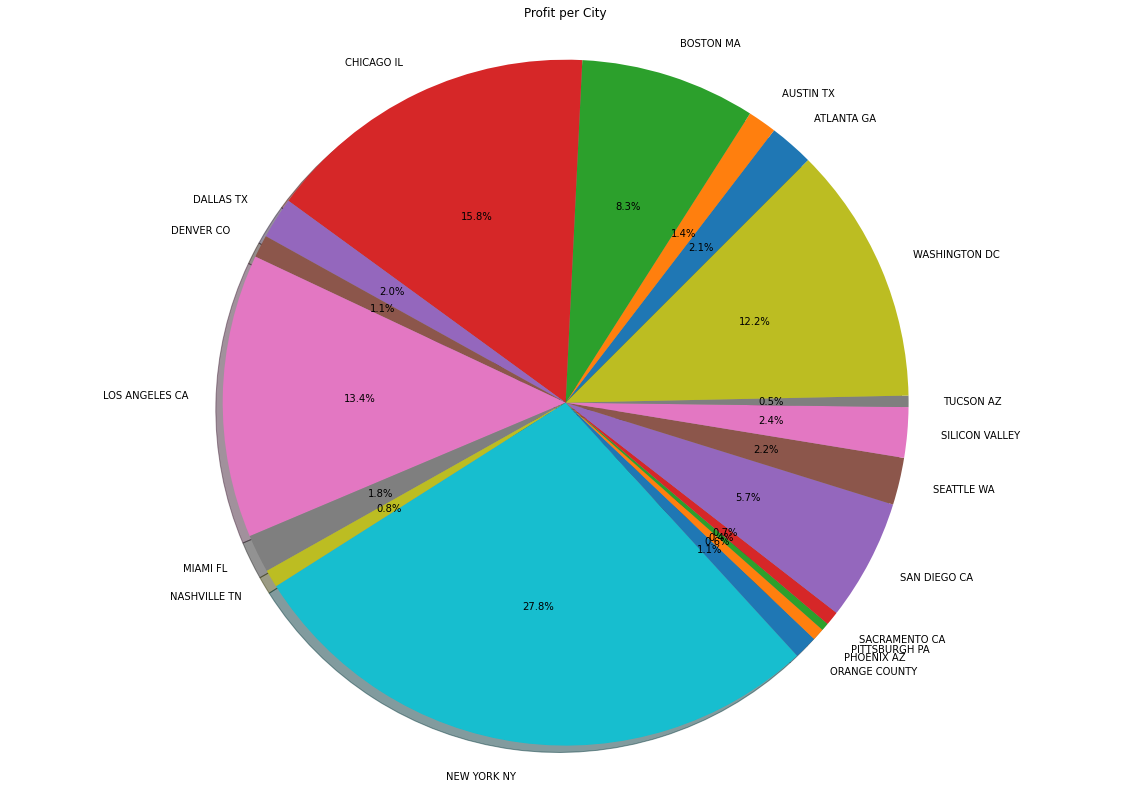

In [89]:
labs = city.index
vals = city.values
figp, axp = plt.subplots(figsize=(20,14))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=45,)
axp.axis('equal')

plt.title('Profit per City')
plt.show()

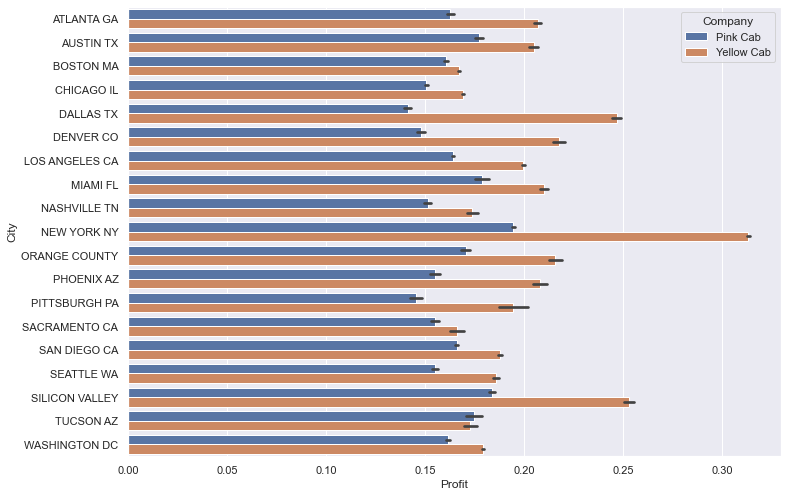

In [125]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="Profit", y="City", data=data,hue='Company')

#### NewYork followed by silicon valley has the highest share of Profit and Transaction

In [104]:
import pandas as pd
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_names_to_normalize = ['Price_Charged', 'Profit', 'Income', 'Cost_of_Trip','KM_Travelled']
x = data[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = data.index)
data[column_names_to_normalize] = df_temp

### Payment Mode Analysis

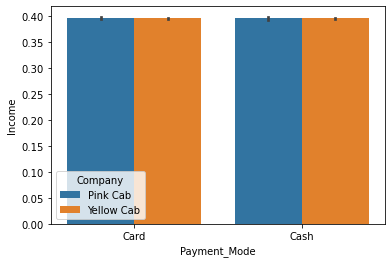

In [110]:
ax = sns.barplot(x="Payment_Mode", y="Income", data=data,hue='Company')

Indicates that payment mode doesn't depends on the Income

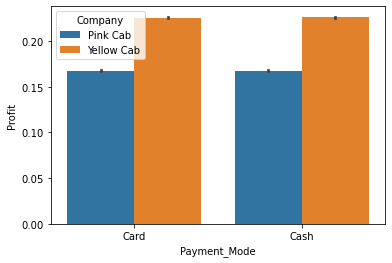

In [111]:
ax = sns.barplot(x="Payment_Mode", y="Profit", data=data,hue='Company')

payment_mode Doesn't have any relation with the profit

### Gender Analysis

In [107]:
pgentr=data[data.Company=='Pink Cab'].groupby(['Gender']).Transaction_ID.count()


In [108]:
pgentr

Gender
Female    37480
Male      47230
Name: Transaction_ID, dtype: int64

In [109]:
ygentr=data[data.Company=='Yellow Cab'].groupby(['Gender']).Transaction_ID.count()
ygentr

Gender
Female    116000
Male      158681
Name: Transaction_ID, dtype: int64

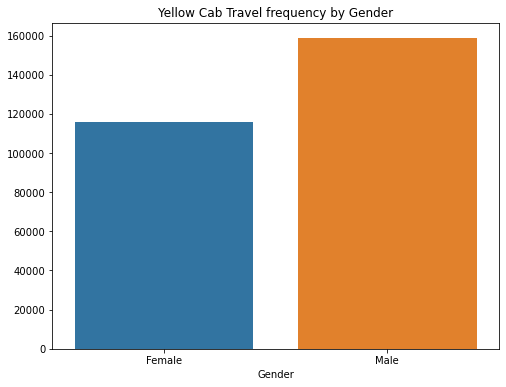

In [91]:
plt.figure(figsize=(8,6))
sns.barplot(x=ygentr.index,y=ygentr.values)
plt.title('Yellow Cab Travel frequency by Gender')
plt.show()

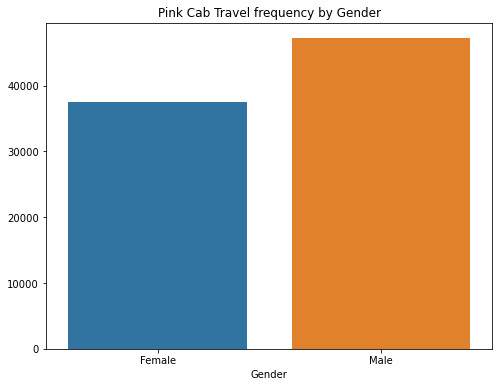

In [105]:
plt.figure(figsize=(8,6))
sns.barplot(x=pgentr.index,y=pgentr.values)
plt.title('Pink Cab Travel frequency by Gender')
plt.show()

#### it clearly shows that pink cab has comparatively more %age of female customer than yellowcab

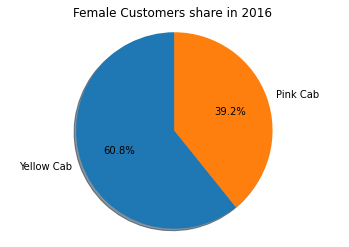

In [117]:
labels = 'Yellow Cab','Pink Cab' 
pct = [data[(data.year==2016) & (data.Company=='Yellow Cab') &(data.Gender=='Male') ]['Customer_ID'].nunique(),data[(data.year==2016) & (data.Company=='Pink Cab') & (data.Gender=='Male')]['Customer_ID'].nunique() ]
fig, ax = plt.subplots()
ax.pie(pct , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')

plt.title('Female Customers share in 2016 ')
plt.show()

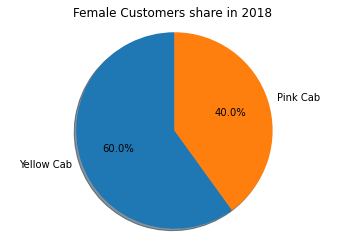

In [119]:
labels = 'Yellow Cab','Pink Cab' 
pct = [data[(data.year==2018) & (data.Company=='Yellow Cab') &(data.Gender=='Male') ]['Customer_ID'].nunique(),data[(data.year==2018) & (data.Company=='Pink Cab') & (data.Gender=='Male')]['Customer_ID'].nunique() ]
fig, ax = plt.subplots()
ax.pie(pct , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')

plt.title('Female Customers share in 2018 ')
plt.show()

#### It shows that pink cab has gain confidence in female customer in 2 years

Yearly Profit

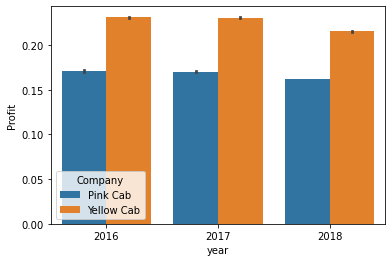

In [112]:
ax = sns.barplot(x="year", y="Profit", data=data,hue='Company')

### Profit Decreases in the year 2018

In [114]:
data.shape

(359392, 18)

# Thus it can be concluded that
* Most of the travelling is done in the month of December around Christmas
  so Festive Offer could be given by the company to increase the no. of customer
* Yellow cab has much more customer share and reliability so it's better to invest in that
* Pink Cab has increased its female customer gradually fro 2016 to 2018
* yellow cab can Provide some additional discount or facilities to attract more female customer
* New York followed by Silicon valley has the highest no. of cab users and Profit for both the company
* There are equal no.of customer using cash and card in both the company
